In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = keras.datasets.fashion_mnist
((train_images, train_ids), (test_images, test_ids)) = dataset.load_data()

---

In [3]:
ids_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images = train_images/255.0 # Normalization 

In [5]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(28,28)),
        keras.layers.Flatten(),
        
        keras.layers.Dense(256, activation=tf.nn.relu),
        keras.layers.Dropout(0.2),
        
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ]
)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
# history = model.fit(train_images, train_ids, epochs=5, validation_split=0.25)

Weight

In [7]:
model_summary = model.summary()
model_summary

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
weight_first_dense_layer = model.layers[1].get_weights()[0]
weight_first_dense_layer

array([[-0.01340193,  0.07299002, -0.05645651, ...,  0.07481416,
         0.00829046, -0.0375022 ],
       [ 0.00928205,  0.01607901,  0.06209759, ..., -0.01128347,
         0.02781119,  0.04032406],
       [ 0.0740369 , -0.0057741 ,  0.01185375, ...,  0.00230811,
         0.05097112,  0.04646478],
       ...,
       [ 0.03792647,  0.00742976,  0.06025934, ..., -0.00791484,
         0.06471999,  0.03909707],
       [ 0.02098875,  0.01018095, -0.02257206, ..., -0.03988984,
        -0.07302625, -0.04096775],
       [-0.02998764, -0.05888549, -0.03990509, ..., -0.07127667,
         0.07310379, -0.05278994]], dtype=float32)

In [11]:
weight_first_dense_layer_zeros = np.zeros(weight_first_dense_layer.shape)
weight_first_dense_layer_zeros

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
# model.layers[1].set_weights([weight_first_dense_layer_zeros, bias_first_dense_layer])

In [13]:
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# history = model.fit(train_images, train_ids, epochs=5, validation_split=0.25)

In [14]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# # plt.title('Accuracy x Epochs')
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.legend(['Train', 'Validation'])

NameError: name 'history' is not defined

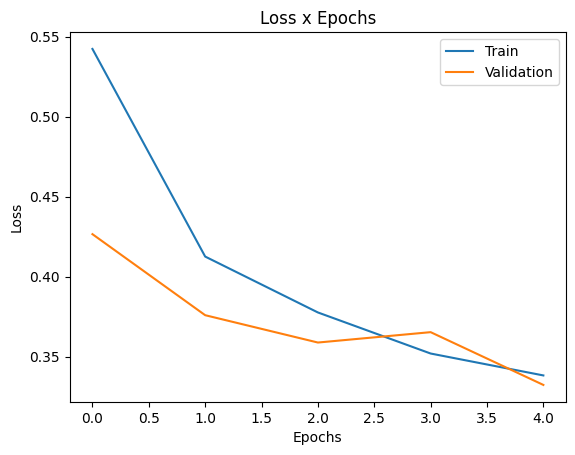

In [23]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Loss x Epochs')
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.legend(['Train', 'Validation'])

In [15]:
# weight_first_dense_layer_random = np.random.rand(784, 256)
# weight_first_dense_layer_random

In [16]:
# model.layers[1].set_weights([weight_first_dense_layer_random, bias_first_dense_layer])

NameError: name 'weight_first_dense_layer_random' is not defined

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_ids, epochs=5, validation_split=0.25)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7633 - loss: 0.6808 - val_accuracy: 0.8438 - val_loss: 0.4184
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.8490 - loss: 0.4135 - val_accuracy: 0.8612 - val_loss: 0.3738
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8641 - loss: 0.3707 - val_accuracy: 0.8712 - val_loss: 0.3513
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8735 - loss: 0.3493 - val_accuracy: 0.8716 - val_loss: 0.3526
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8815 - loss: 0.3204 - val_accuracy: 0.8719 - val_loss: 0.3480


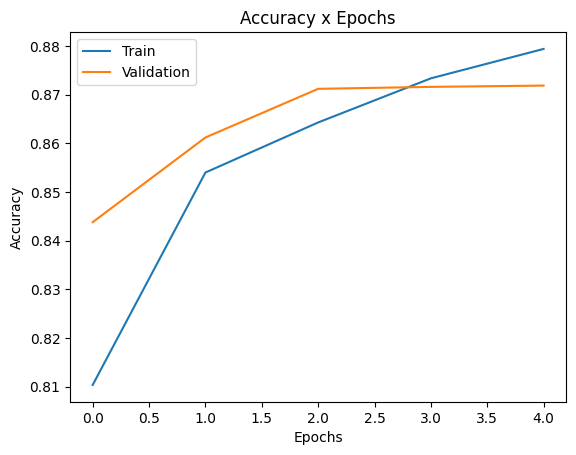

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy x Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'])

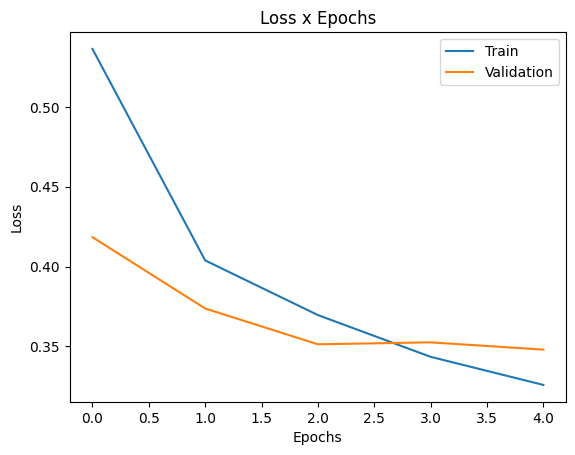

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss x Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'])

In [20]:
model.get_config()

{'name': 'sequential',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units

Bias

In [21]:
bias_first_dense_layer = model.layers[1].get_weights()[1]
bias_first_dense_layer

array([ 1.96615532e-01, -1.15504311e-02,  2.32565284e-01, -6.87941760e-02,
        1.31046891e-01,  2.26309016e-01, -1.38754204e-01, -2.12043840e-02,
        4.60632294e-01,  5.41556627e-02,  1.60398483e-01, -3.77806753e-01,
        2.55047977e-01,  2.14254469e-01,  4.63616028e-02,  1.24093466e-01,
        1.55747771e-01,  3.53629626e-02,  1.96160376e-01, -9.78145935e-03,
       -1.57265738e-02,  2.12481812e-01,  3.77006643e-02,  2.69512743e-01,
        1.95084333e-01,  8.43258761e-03,  2.17480525e-01, -9.04089212e-02,
        2.38079578e-01,  2.81338543e-01,  2.18964681e-01,  3.20621133e-02,
        3.48256111e-01, -1.80772021e-01, -1.19984504e-02,  1.76303104e-01,
        2.58631766e-01,  1.77894048e-02, -5.26466183e-02, -1.70141682e-02,
        1.91801012e-01, -2.64004543e-02,  1.12351365e-01,  1.63692757e-01,
       -1.20545961e-01,  2.72207886e-01, -1.16613032e-02, -1.72836501e-02,
       -9.83121991e-03,  7.94248134e-02, -3.49355303e-02,  2.72631854e-01,
        4.64429170e-01,  

In [22]:
len(weight_first_dense_layer)

784

---

In [24]:
adam = keras.optimizers.Adam(learning_rate=0.5)

model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_ids, epochs=5, validation_split=0.25)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8841 - loss: 0.3129 - val_accuracy: 0.8731 - val_loss: 0.3488
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8889 - loss: 0.2996 - val_accuracy: 0.8809 - val_loss: 0.3250
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8897 - loss: 0.2913 - val_accuracy: 0.8831 - val_loss: 0.3227
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8961 - loss: 0.2777 - val_accuracy: 0.8853 - val_loss: 0.3207
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8974 - loss: 0.2738 - val_accuracy: 0.8845 - val_loss: 0.3166


In [26]:
adam = keras.optimizers.Adam(learning_rate=0.5)

model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_ids, 
                    batch_size = 50, epochs=5, validation_split=0.25)

Epoch 1/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0986 - loss: 2.3476 - val_accuracy: 0.0993 - val_loss: 2.3335
Epoch 2/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0993 - loss: 2.3464 - val_accuracy: 0.1003 - val_loss: 2.3772
Epoch 3/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1009 - loss: 2.3426 - val_accuracy: 0.1000 - val_loss: 2.3861
Epoch 4/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0962 - loss: 2.3535 - val_accuracy: 0.1000 - val_loss: 2.3529
Epoch 5/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0995 - loss: 2.3436 - val_accuracy: 0.1039 - val_loss: 2.3620


In [27]:
adam = keras.optimizers.Adam(learning_rate=0.5)

model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_ids, 
                    batch_size = 25, epochs=5, validation_split=0.25)

Epoch 1/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.1013 - loss: 2.3699 - val_accuracy: 0.1003 - val_loss: 2.3848
Epoch 2/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1003 - loss: 2.3677 - val_accuracy: 0.1004 - val_loss: 2.4291
Epoch 3/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1033 - loss: 2.3646 - val_accuracy: 0.1039 - val_loss: 2.3541
Epoch 4/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1004 - loss: 2.3650 - val_accuracy: 0.1039 - val_loss: 2.3604
Epoch 5/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1002 - loss: 2.3671 - val_accuracy: 0.1003 - val_loss: 2.3863


In [32]:
adam = keras.optimizers.Adam(learning_rate=0.5)

callback = [keras.callbacks.EarlyStopping(monitor='val_loss'),
            keras.callbacks.ModelCheckpoint(filepath='log_best_model.hdf5',
            monitor='val_loss', save_best_only=True)]

model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_ids, callbacks=callback,
                    batch_size = 100, epochs=5, validation_split=0.25)

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=log_best_model.hdf5

In [35]:
adam = keras.optimizers.Adam(learning_rate=0.002)

callback = [
    keras.callbacks.EarlyStopping(monitor='val_loss'),
    keras.callbacks.ModelCheckpoint(filepath='log_best_model.keras', monitor='val_loss', save_best_only=True)
]


model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_ids, callbacks=callback,
                    batch_size = 100, epochs=5, validation_split=0.25)

Epoch 1/5
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1016 - loss: 2.3180 - val_accuracy: 0.0993 - val_loss: 2.3158
Epoch 2/5
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0998 - loss: 2.3029 - val_accuracy: 0.0993 - val_loss: 2.3157
Epoch 3/5
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1026 - loss: 2.3027 - val_accuracy: 0.0997 - val_loss: 2.3159
